# 1. 환경 설정

In [1]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
import random

# 랜덤 시드 고정
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)  

# 구글 드라이브 폴더 마운트
# from google.colab import drive, files
# drive.mount('/gdrive')

# 2. 데이터셋 준비

In [2]:
# 데이콘 사이트에서 다운로드한 CSV파일을 읽어오기
# drive_path = "/gdrive/My Drive/"
train = pd.read_csv("fashionmnist/train.csv")
test = pd.read_csv("fashionmnist/test.csv")

print(train.shape, test.shape)   

(60000, 786) (10000, 785)


In [3]:
# train 데이터 보기
train.head()

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# train 데이터를 28*28 이미지로 변환
train_images = train.loc[:, 'pixel1':].values.reshape(-1, 28, 28)
train_images.shape

(60000, 28, 28)

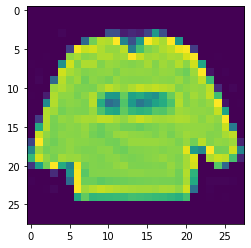

In [5]:
# 첫번째 이미지 출력
import matplotlib.pyplot as plt
plt.imshow(train_images[0]);

In [6]:
# 목표 레이블 
y_train = train.loc[:, 'label']
y_train.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [7]:
# 숫자 레이블을 실제 레이블과 연결하여 확인
target_values = {0 : 'T-shirt/top', 
                 1 : 'Trouser', 
                 2: 'Pullover', 
                 3: 'Dress', 
                 4: 'Coat', 
                 5: 'Sandal', 
                 6: 'Shirt', 
                 7: 'Sneaker', 
                 8: 'Bag', 
                 9: 'Ankle boot'}
print(y_train[0])
print(target_values[y_train[0]])

2
Pullover


In [8]:
# test 데이터를 28*28 이미지로 변환
test_images = test.loc[:, 'pixel1':].values.reshape(-1, 28, 28)
test_images.shape

(10000, 28, 28)

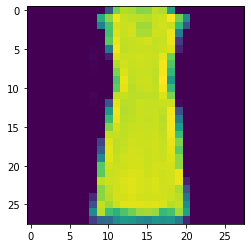

In [9]:
# 500번째 test 이미지를 출력
plt.imshow(test_images[499]);

# 2. 데이터 전처리 (Pre-processing)

In [10]:
# 피처 스케일 맞추기 
X_train = train_images / 255.
X_test = test_images / 255.
print("최소값:", X_train[0].min())
print("최대값:", X_train[0].max())

최소값: 0.0
최대값: 1.0


In [11]:
# 채널 차원 추가
print("변환 전:", X_train.shape, X_test.shape)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
print("변환 후:", X_train.shape, X_test.shape)

변환 전: (60000, 28, 28) (10000, 28, 28)
변환 후: (60000, 28, 28, 1) (10000, 28, 28, 1)


In [12]:
# Train - Validation 데이터 구분
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val =  train_test_split(X_train, y_train, test_size=0.2, 
                                             stratify=y_train, 
                                             shuffle=True, random_state=SEED)
print("학습 데이터셋 크기: ", X_tr.shape, y_tr.shape)
print("검증 데이터셋 크기: ", X_val.shape, y_val.shape)

학습 데이터셋 크기:  (48000, 28, 28, 1) (48000,)
검증 데이터셋 크기:  (12000, 28, 28, 1) (12000,)


# 3. 모델 구축

### MLP 모델

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=[28, 28]))
mlp_model.add(Dense(units=64, activation='relu'))
mlp_model.add(Dense(units=10, activation='softmax'))

mlp_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['acc'])

mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


2022-05-24 17:46:58.346708: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
mlp_history = mlp_model.fit(X_tr, y_tr, batch_size=64, epochs=20,
                        validation_data=(X_val, y_val),
                        verbose=2)

Epoch 1/20
750/750 - 1s - loss: 0.5740 - acc: 0.8021 - val_loss: 0.4500 - val_acc: 0.8425 - 1s/epoch - 1ms/step
Epoch 2/20
750/750 - 1s - loss: 0.4221 - acc: 0.8501 - val_loss: 0.4063 - val_acc: 0.8595 - 597ms/epoch - 796us/step
Epoch 3/20
750/750 - 1s - loss: 0.3869 - acc: 0.8628 - val_loss: 0.4007 - val_acc: 0.8598 - 622ms/epoch - 829us/step
Epoch 4/20
750/750 - 1s - loss: 0.3632 - acc: 0.8702 - val_loss: 0.3955 - val_acc: 0.8579 - 626ms/epoch - 835us/step
Epoch 5/20
750/750 - 1s - loss: 0.3462 - acc: 0.8753 - val_loss: 0.3768 - val_acc: 0.8692 - 617ms/epoch - 823us/step
Epoch 6/20
750/750 - 1s - loss: 0.3294 - acc: 0.8804 - val_loss: 0.3521 - val_acc: 0.8761 - 719ms/epoch - 959us/step
Epoch 7/20
750/750 - 1s - loss: 0.3171 - acc: 0.8843 - val_loss: 0.3478 - val_acc: 0.8797 - 586ms/epoch - 781us/step
Epoch 8/20
750/750 - 1s - loss: 0.3049 - acc: 0.8899 - val_loss: 0.3543 - val_acc: 0.8722 - 583ms/epoch - 777us/step
Epoch 9/20
750/750 - 1s - loss: 0.2955 - acc: 0.8923 - val_loss: 0.34

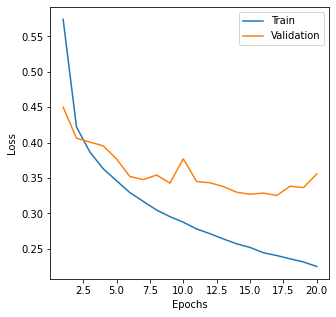

In [15]:
# 손실 함수 그래프
def plot_loss_curve(history, total_epoch=10, start=1):
    plt.figure(figsize=(5, 5))
    plt.plot(range(start, total_epoch + 1), 
             history.history['loss'][start-1:total_epoch], 
             label='Train')
    plt.plot(range(start, total_epoch + 1), 
             history.history['val_loss'][start-1:total_epoch], 
             label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss_curve(history=mlp_history, total_epoch=20, start=1)                   

### CNN 활용

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=16, kernel_size=(3, 3), 
                    activation='relu', input_shape=[28, 28, 1]))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))

cnn_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['acc'])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 2704)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                173120    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 173,930
Trainable params: 173,930
Non-trainable params: 0
________________________________________________

In [17]:
cnn_history = cnn_model.fit(X_tr, y_tr, batch_size=64, epochs=20,
                        validation_data=(X_val, y_val),
                        verbose=2) 

Epoch 1/20
750/750 - 4s - loss: 0.4935 - acc: 0.8271 - val_loss: 0.3740 - val_acc: 0.8667 - 4s/epoch - 5ms/step
Epoch 2/20
750/750 - 3s - loss: 0.3339 - acc: 0.8811 - val_loss: 0.3101 - val_acc: 0.8921 - 3s/epoch - 5ms/step
Epoch 3/20
750/750 - 3s - loss: 0.2903 - acc: 0.8967 - val_loss: 0.3025 - val_acc: 0.8927 - 3s/epoch - 5ms/step
Epoch 4/20
750/750 - 4s - loss: 0.2616 - acc: 0.9061 - val_loss: 0.2879 - val_acc: 0.8957 - 4s/epoch - 5ms/step
Epoch 5/20
750/750 - 4s - loss: 0.2390 - acc: 0.9144 - val_loss: 0.2889 - val_acc: 0.9007 - 4s/epoch - 5ms/step
Epoch 6/20
750/750 - 4s - loss: 0.2219 - acc: 0.9204 - val_loss: 0.2728 - val_acc: 0.9022 - 4s/epoch - 5ms/step
Epoch 7/20
750/750 - 4s - loss: 0.2023 - acc: 0.9268 - val_loss: 0.2676 - val_acc: 0.9032 - 4s/epoch - 5ms/step
Epoch 8/20
750/750 - 4s - loss: 0.1866 - acc: 0.9326 - val_loss: 0.2596 - val_acc: 0.9058 - 4s/epoch - 5ms/step
Epoch 9/20
750/750 - 4s - loss: 0.1737 - acc: 0.9377 - val_loss: 0.2556 - val_acc: 0.9109 - 4s/epoch - 5

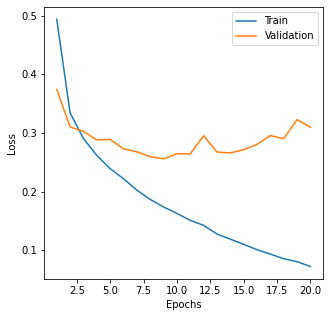

In [18]:
plot_loss_curve(history=cnn_history, total_epoch=20, start=1)    

In [19]:
from tensorflow.keras.layers import Dropout
def build_cnn():
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(3, 3), 
                     activation='relu', input_shape=[28, 28, 1]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=10, activation='softmax'))

    model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['acc'])

    return model

cnn_model = build_cnn()
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2704)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                173120    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                      

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  patience=10)

cnn_history = cnn_model.fit(X_tr, y_tr, batch_size=64, epochs=100,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping],
                        verbose=0) 

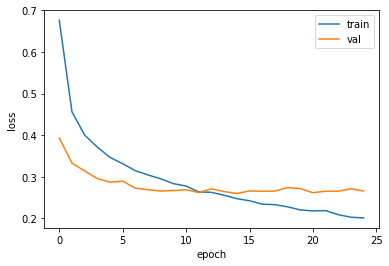

In [21]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

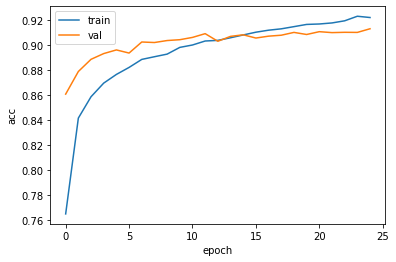

In [22]:
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'val'])
plt.show()

In [23]:
cnn_model.evaluate(X_val, y_val)

375/375 [==============================] - 1s 1ms/step - loss: 0.2658 - acc: 0.9128


[0.2657662630081177, 0.9128333330154419]

In [24]:
y_pred_proba = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_proba, axis=-1)
y_pred_classes[:10]

array([0, 1, 6, 6, 3, 6, 8, 6, 5, 0])

In [25]:
# submission['label'] = y_pred_classes
# submission_filepath = drive_path + 'mnist_cnn_submission1.csv'   
# submission.to_csv(submission_filepath, index=False)

In [26]:
# 사용자 정의 콜백 함수
from tensorflow.keras.callbacks import Callback

class my_callback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc') > 0.91):
      self.model.stop_training = True
      print("\n")
      print("목표 정확도 달성: 검증 정확도 %.4f" % logs.get('val_acc'))

my_callback = my_callback()

# Best Model 저장
from tensorflow.keras.callbacks import ModelCheckpoint

best_model_path = "best_cnn_model.h5"
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss', 
                                  save_best_only=True, save_weights_only=False)

# CNN 모델 학습
cnn_model = build_cnn()
cnn_history = cnn_model.fit(X_tr, y_tr, batch_size=64, epochs=100,
                        validation_data=(X_val, y_val),
                        callbacks=[my_callback, save_best_model],
                        verbose=2) 

Epoch 1/100
750/750 - 4s - loss: 0.6582 - acc: 0.7716 - val_loss: 0.3918 - val_acc: 0.8619 - 4s/epoch - 5ms/step
Epoch 2/100
750/750 - 3s - loss: 0.4468 - acc: 0.8451 - val_loss: 0.3331 - val_acc: 0.8808 - 3s/epoch - 5ms/step
Epoch 3/100
750/750 - 4s - loss: 0.3906 - acc: 0.8641 - val_loss: 0.3158 - val_acc: 0.8857 - 4s/epoch - 5ms/step
Epoch 4/100
750/750 - 4s - loss: 0.3607 - acc: 0.8750 - val_loss: 0.2976 - val_acc: 0.8916 - 4s/epoch - 5ms/step
Epoch 5/100
750/750 - 3s - loss: 0.3364 - acc: 0.8816 - val_loss: 0.2882 - val_acc: 0.8947 - 3s/epoch - 5ms/step
Epoch 6/100
750/750 - 3s - loss: 0.3211 - acc: 0.8859 - val_loss: 0.2833 - val_acc: 0.8964 - 3s/epoch - 4ms/step
Epoch 7/100
750/750 - 3s - loss: 0.3045 - acc: 0.8902 - val_loss: 0.2765 - val_acc: 0.9000 - 3s/epoch - 4ms/step
Epoch 8/100
750/750 - 3s - loss: 0.2933 - acc: 0.8962 - val_loss: 0.2727 - val_acc: 0.9003 - 3s/epoch - 4ms/step
Epoch 9/100
750/750 - 3s - loss: 0.2860 - acc: 0.8963 - val_loss: 0.2676 - val_acc: 0.8997 - 3s/

In [27]:
from tensorflow.keras.models import load_model
# ModelCheckPoint에 저장해둔 모델을 로딩 
best_model = load_model("best_cnn_model.h5")
best_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2704)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                173120    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                      

In [28]:
y_pred_proba = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_proba, axis=-1)
print(y_pred_proba)
print(y_pred_classes)
# submission['label'] = y_pred_classes
# submission_filepath = drive_path + 'mnist_cnn_submission2.csv'   
# submission.to_csv(submission_filepath, index=False)

[[9.9610341e-01 1.8351363e-15 3.1592551e-06 ... 8.5470194e-22
  3.1081711e-09 2.7112978e-22]
 [8.9230618e-14 1.0000000e+00 1.9243250e-15 ... 8.9314453e-24
  4.5319882e-17 3.6444827e-27]
 [6.4850666e-02 5.5367311e-10 4.8236111e-01 ... 4.2335737e-13
  9.9884539e-07 3.3911754e-12]
 ...
 [1.4062561e-15 1.3072255e-21 2.7022757e-16 ... 9.8152226e-17
  1.0000000e+00 5.0588941e-21]
 [1.2538779e-06 5.0674751e-12 2.4507503e-09 ... 3.1997847e-09
  9.9999070e-01 9.0589090e-08]
 [5.3747829e-07 9.9927074e-01 2.0207353e-06 ... 9.6405870e-09
  6.3515145e-05 2.8001215e-10]]
[0 1 2 ... 8 8 1]
